In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
print("DataFrame Shape:")
print(df.shape)
print("DataFrame Type of attributes:")
print(df.dtypes)
print("Are there any null values?")
print(df.isnull().sum())
print("See the Description of DataFrame")
df.describe()

DataFrame Shape:
(303, 14)
DataFrame Type of attributes:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
Are there any null values?
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
See the Description of DataFrame


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df['output'].value_counts(normalize=True) * 100
corr = df.corr()['output'].sort_values(ascending=False)
print(corr)


output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


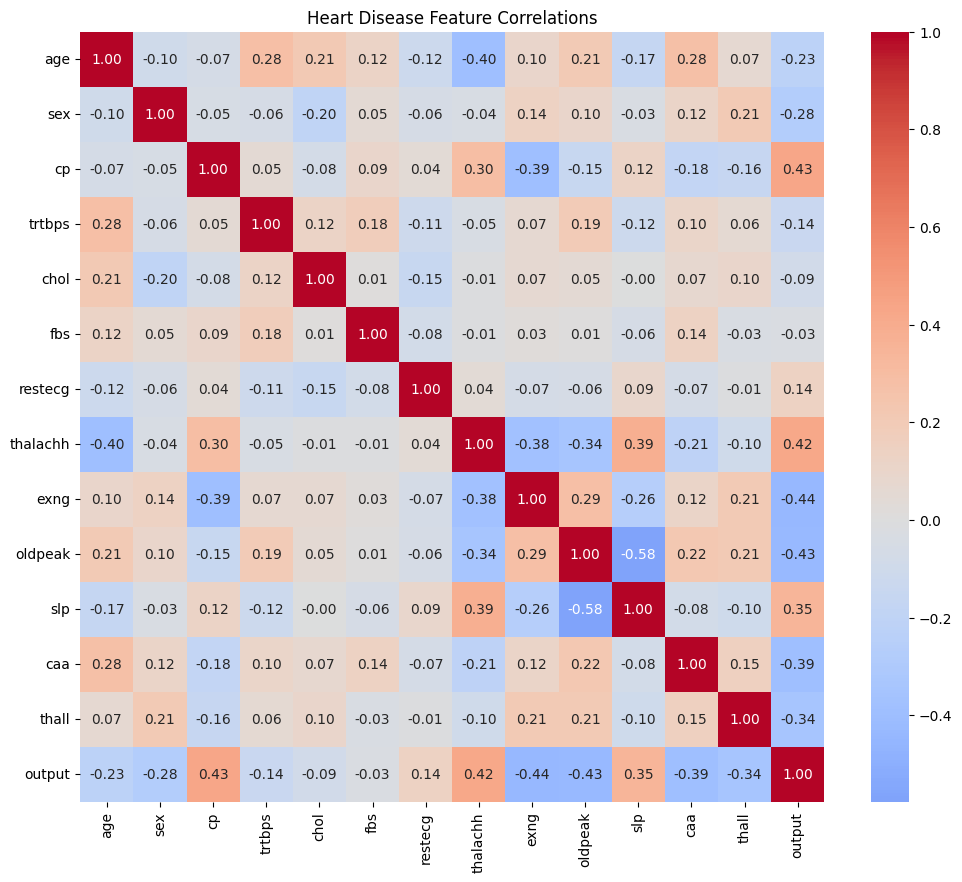

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Heart Disease Feature Correlations')
plt.show()


In [11]:

X = df.drop('output', axis=1)
y = df['output']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

Train: output
1    0.545455
0    0.454545
Name: proportion, dtype: float64
Test: output
1    0.540984
0    0.459016
Name: proportion, dtype: float64


In [15]:
df.columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



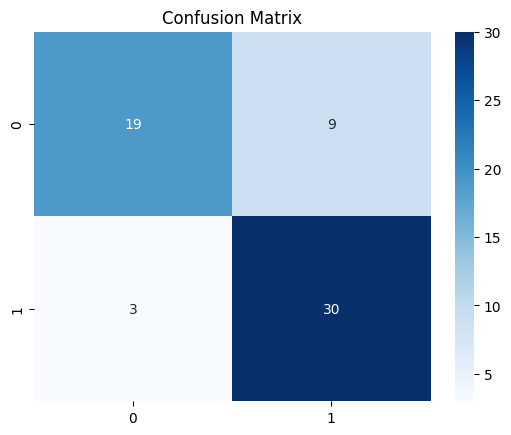

ROC-AUC: 0.8690476190476191


In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


cp          0.157392
thalachh    0.117491
oldpeak     0.113399
thall       0.107062
chol        0.087131
caa         0.086078
age         0.077759
trtbps      0.074127
slp         0.059454
exng        0.057655
sex         0.030452
restecg     0.022112
fbs         0.009889
dtype: float64


In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("CV Accuracy: mean=", cv_scores.mean(), "std=", cv_scores.std())


CV Accuracy: mean= 0.8308673469387754 std= 0.04093078481123406


In [21]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 5, None], 'min_samples_split': [2, 5]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9152810152810152
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



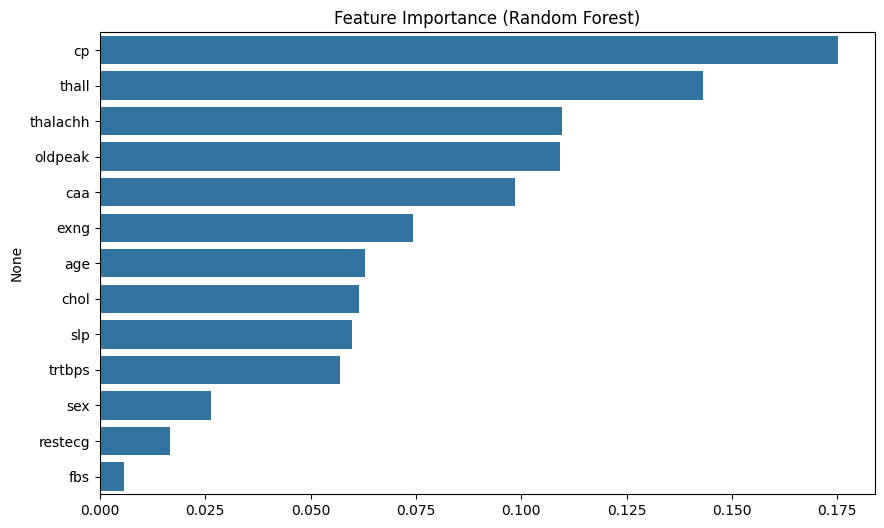

In [22]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [23]:
models = {'Logistic': model, 'RF': best_rf}
for name, mod in models.items():
    score = roc_auc_score(y_test, mod.predict_proba(X_test_scaled)[:,1])
    print(f"{name} ROC-AUC: {score:.3f}")


Logistic ROC-AUC: 0.869
RF ROC-AUC: 0.921


In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]))


XGBoost Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61

XGBoost ROC-AUC: 0.8560606060606061


In [25]:
results = pd.DataFrame({
    'Model': ['Logistic', 'RandomForest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, model.predict(X_test_scaled)),
                 accuracy_score(y_test, best_rf.predict(X_test_scaled)),
                 accuracy_score(y_test, xgb.predict(X_test_scaled))],
    'ROC-AUC': [roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]),
                roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]),
                roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1])]
})
print(results)


          Model  Accuracy   ROC-AUC
0      Logistic  0.803279  0.869048
1  RandomForest  0.786885  0.920996
2       XGBoost  0.803279  0.856061


In [26]:
import joblib
best_model = best_rf
joblib.dump(best_model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved!")


Model saved!


In [30]:
loaded_model = joblib.load('heart_disease_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

patient = {'age':55, 'sex':1, 'cp':2, 'trtbps':140, 'chol':280,
           'fbs':0, 'restecg':1, 'thalachh':140, 'exng':1,
           'oldpeak':2.0, 'slp':2, 'caa':1, 'thall':2}

patient_df = pd.DataFrame([patient])
patient_scaled = loaded_scaler.transform(patient_df)
risk = 'HIGH' if loaded_model.predict(patient_scaled)[0] == 1 else 'LOW'
prob = loaded_model.predict_proba(patient_scaled)[0][1]
print(f"Patient Risk: {risk} (Probability: {prob:.1%})")


Patient Risk: HIGH (Probability: 55.2%)
